## 1. Introduction

The Students Performance dataset offers comprehensive insights into academic achievements across subjects like Math, Reading, and Writing. Alongside, it encompasses additional attributes that enable analysis of the influence of factors such as gender and race/ethnicity on student performance.

For the analysis, we will consider a passing grade of 60 and above as an overall indicator of student success. This approach allows us to evaluate the proportion of students who meet or exceed the minimum passing threshold and investigate potential associations between various attributes and academic outcomes.

### Exercise Objectives

In this exercise, we aim to analyse the students performance to understand the impact of several factors on their success. Furthermore, we will be performing the required data preprocessing as a preparation for building an ML model that can predict the student success given examples of the studied impact factors.

This exercise is considered as a refresher for the ML pipeline steps.

### Instructions

Follow the instructions provided in the notebook and continue the missing code pieces to build the first ML model in this course.

To begin, download the data and place it in the same folder as the notebook.

## 2. Data Overview

### Required Packages

You will notice three familiar packages that we will use to load, analyse, and visualize the data

The documentation of each library is included below. Don't hesitate to access it to search for a function

Numpy: https://numpy.org/devdocs/reference/index.html 

Pandas: https://pandas.pydata.org/docs/reference/index.html

Matplotlib: https://matplotlib.org/stable/gallery/index.html

When you open the webpage, there is a side barthat contains useful functions

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading the dataset into panadas dataframe

In [137]:
data = pd.read_csv(".//StudentsPerformance.csv")

### Display the first five rows of the dataset

In [138]:
print("first 5 rows: {}".format(data[:5]))# continue the code

first 5 rows:    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


### Print the shape of the data

In [139]:
df_shape = data.shape# continue the code
print(f"Columns:{df_shape[1]}\nRows:{df_shape[0]}")

Columns:8
Rows:1000


### Extract data info

In [140]:
data.info()# continue the code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Extract basic statistics about the data

In [141]:
data.describe()# continue the code

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Let's start exploring the data
### Get the unique values of the "race/ethnicity" column

In [142]:
data["race/ethnicity"].unique()# continue the code

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

### Get the unique values of the "parental level of education" column

In [143]:
data["parental level of education"].unique()# continue the code

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

### Get the maximum grades for the math, reading, and writing

In [144]:
print(data['math score'].max())#print the max math score
print(data['reading score'].max())#print the max reading score
print(data['writing score'].max())#print the max writing scre

100
100
100


### Print students who scored mre than 80 on the math, reading, and writing

In [145]:
new_data = data[(data["math score"] >= 80) & (data["reading score"] >= 80) & (data["writing score"] >= 80)] # continue the code
new_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
34,male,group E,some college,standard,none,97,87,82
49,male,group C,high school,standard,completed,82,84,82
...,...,...,...,...,...,...,...,...
957,female,group D,master's degree,standard,none,92,100,100
962,female,group E,associate's degree,standard,none,100,100,100
970,female,group D,bachelor's degree,standard,none,89,100,100
979,female,group C,associate's degree,standard,none,91,95,94


### Given these highly scoring students, what is their gender distribution? use a pie chart to plot the distribution

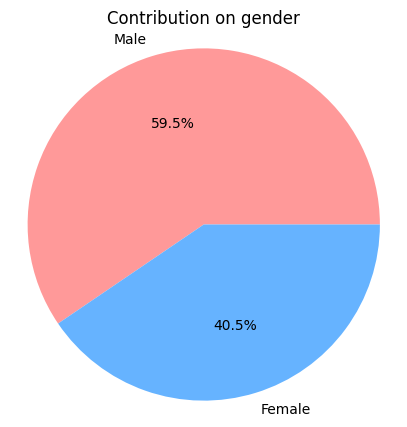

In [146]:
gender_counts_all = new_data['gender'].value_counts()#continue the code to get the female and male counts
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(5, 5))
plt.pie(gender_counts_all, colors=colors, labels=['Male', 'Female'], autopct='%1.1f%%')# continue the code and use the same defined color
plt.title('Contribution on gender')
plt.axis('equal') 
plt.show()

### What is the race of these highly scoring students? use a pie chart to plot the distribution

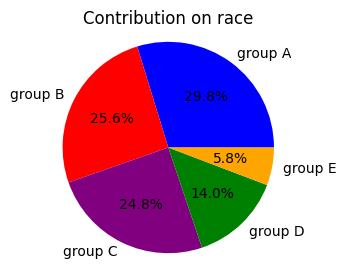

In [147]:
group_counts = new_data['race/ethnicity'].value_counts()
colors = ['blue', 'red', 'purple', 'green', 'orange']

plt.figure(figsize=(3,3))
plt.pie(group_counts, colors=colors, labels=['group A', 'group B', 'group C', 'group D', 'group E'], autopct='%1.1f%%')
plt.title('Contribution on race')
plt.axis('equal')
plt.show()
# Write your code to get the below figure

### Extract information about the students who score above 90 on math

In [148]:
data_math = data[(data['math score'] >= 90)]#continue the code
data_math.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90,95,93
34,male,group E,some college,standard,none,97,87,82
104,male,group C,some college,standard,completed,98,86,90
114,female,group E,bachelor's degree,standard,completed,99,100,100
121,male,group B,associate's degree,standard,completed,91,89,92


### Plot a pie chart showing the distribution of students who scored well on math v.s. others who scored below 90

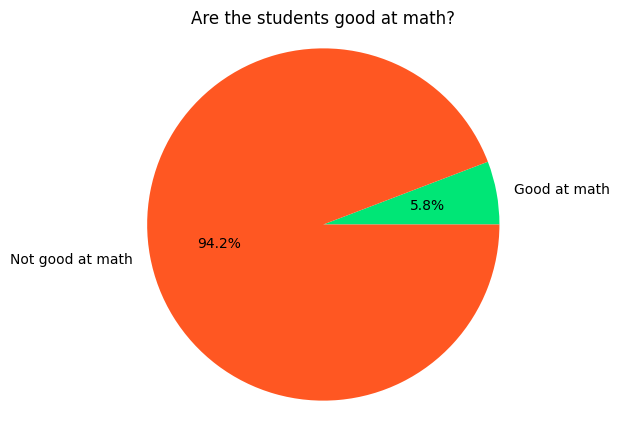

In [149]:
good_at_math = data_math.shape[0]# continue the code
not_goog_at_math = data[(data['math score'] < 90)].shape[0]# continue the cde

sizes = [good_at_math, not_goog_at_math]
labels = ["Good at math", "Not good at math"]
colors = ["#00E676","#FF5722"]

# Plot a pie chart by writing the code below
plt.figure(figsize=(5,5))
plt.pie(sizes, colors=colors,labels=labels, autopct='%1.1f%%')
plt.title('Are the students good at math?')
plt.axis('equal')
plt.show()

### Check for missing data in the dataset

In [150]:
data.isnull().sum()#hind use the .isna function

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## 3. Data Preprocessing

### Get a copy of the original dataset and call it ml_students_df

In [151]:
ml_students_df = data.copy()#hint: use the .copy function

### Create an average_score column that averages the math, reading, and writing scores. Then, add this column to the ml_student_df dataframe

In [152]:
# Write your code here

ml_students_df['avarage_score'] = ml_students_df[['math score', 'reading score', 'writing score']].mean(axis=1)
ml_students_df['avarage_score']
# when printing the content of the new column, you should get the below output

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: avarage_score, Length: 1000, dtype: float64

### Create a status column, which indicates if a student has passed by on his/her grade. The student passes if the average grade is above or equal to 60

In [153]:
# Write your code here

for index, student in ml_students_df.iterrows():
    if student['avarage_score'] >= 60:
        ml_students_df.at[index, 'results'] = 'Passed'
    else:  ml_students_df.at[index, 'results'] = 'Failed'

ml_students_df['results'].head()

# Sample output:

0    Passed
1    Passed
2    Passed
3    Failed
4    Passed
Name: results, dtype: object

### Drop the following columns: math score, reading score, writing score, and average_score

In [154]:
# hind: use the .drop function
# Write your code here
ml_students_df.drop('math score', axis=1, inplace=True)
ml_students_df.drop('reading score', axis=1, inplace=True)
ml_students_df.drop('writing score', axis=1, inplace=True)

# The resulting dataframe looks like:

### Apply one hot encoding on all columns except the status column

In [155]:
# hint use the pd.getdummies function
# Write your code hereml_students_df = ml_students_df.astype(int)
encoded_data = pd.get_dummies(ml_students_df,columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course'])
encoded_data
# The resulting dataframe would have the following form:

,avarage_score,results,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72.666667,Passed,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,82.333333,Passed,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,92.666667,Passed,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
3,49.333333,Failed,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,76.333333,Passed,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,94.000000,Passed,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False
996,57.333333,Failed,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True
997,65.000000,Passed,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False
998,74.333333,Passed,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,True,False


### Convert the status column to categorical values of 0 or 1. 0 for failed and 1 for passed.

In [156]:
## Target Variable Mapping
status_mapping = {"Passed":0,"Failed": 1}
encoded_data["results"] = encoded_data["results"].map(status_mapping)
encoded_data
# continue the code (hind: use the .map function)

,avarage_score,results,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72.666667,0,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,82.333333,0,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,92.666667,0,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
3,49.333333,1,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,76.333333,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,94.000000,0,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False
996,57.333333,1,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True
997,65.000000,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False
998,74.333333,0,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,True,False


### Define the features and target

In [157]:
X = encoded_data.drop(columns=['results'])# Continue the code
y = ml_students_df['results'] # Continue the code

#### split the data into training and test datasets

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  # Continue the code


## 4. Build and train a K-nearest neighbors classifier
### Simply run the following cells to make sure that you get similar model performance

### We will be studying the K-nearest neighbors classifier model in more details in subsequent weeks

In [159]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_filled, y_train_filled)

ValueError: Input y contains NaN.

### Checking the model performance on training dataset

In [ ]:
# the accuracy of the model on the training data.
knn_training_accuracy = knn.score(X_train, y_train, sample_weight=None)
print(knn_training_accuracy)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Checking the model performance on testing dataset

In [33]:
# the accuracy of the model on the testing data.
knn_testing_accuracy = knn.score(X_test, y_test, sample_weight=None)
print(knn_testing_accuracy)

0.66


/Users/hanisami/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
